In [5]:
import json 
import numpy as np
import cv2
from matplotlib import pyplot as plt

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

import os

import urllib.request as urllib2

In [6]:
DATA_PATH = './data/'
SAVE_PATH = './result/'

SAVE_DIR = ''

JSON_NAME = 'personbicycle.json'
classes = ["bicycle", "person"]

In [30]:
class SAVE_IMAGE:
    
    def __init__(self, ncols = 0, nrows = 0, figTitle=""):
        
        if ncols == 0 or nrows == 0:
            raise ValueError("ncols and nrows must be initialize")
        
        dpi = 80
        height, width, depth = CV2_IMG.shape
        figsize = width / float(dpi) * ncols , height / float(dpi) * nrows
        self.fig, self.ax = plt.subplots(ncols = ncols, nrows = nrows, figsize=figsize)
        self.ncols = ncols
        self.nrows = nrows
        
        if figTitle is not "":
            self.fig.suptitle(figTitle, fontsize=20)
        self.ccols = 0
        self.crows = 0
        
    def addImage(self, img, title = ""):
        
        if self.nrows == 1:
            if self.ncols == 1:
                self.ax.imshow(img)
                self.ax.set_title(title, fontsize=15)
            else:
                self.ax[self.ccols].imshow(img)
                self.ax[self.ccols].set_title(title, fontsize=15)
        else:
            self.ax[self.crows][self.ccols].imshow(img)
            self.ax[self.crows][self.ccols].set_title(title, fontsize=15)

        if self.ccols+1 == self.ncols:
            self.crows = self.crows + 1
            self.ccols = 0
        else:
            self.ccols = self.ccols + 1
            
    def showImage(self):
        plt.show()
        
    def saveImage(self, save_path, save_title):
        plt.savefig(save_path+save_title+'.png', bbox_inches='tight')

In [13]:
def CheckDirExists(PATH, DIR):
    if not os.path.exists(PATH+DIR):
        os.makedirs(PATH+DIR)

In [18]:
def ParsingJSON(JSON_PATH, classes):
    with open(JSON_PATH) as json_file:
        json_data = json.load(json_file)

    data_list = []

    for cls in classes:
        data_list.append(np.array(json_data[cls], dtype='uint8'))
        
    return data_list

In [35]:
def GetHeatmap(img_list, height, width, title = "", figSet = False, fig = [0, 0]):
    _title = "_color_heatmap"
    heatmaps = []
    
    if figSet:
        save_image = SAVE_IMAGE(nrows = fig[0], ncols = fig[1], figTitle=title+_title)
    else: 
        save_image = SAVE_IMAGE(nrows = 1, ncols = len(img_list), figTitle=title+_title)
    
    for index, img in enumerate(img_list):
        heatmap = cv2.applyColorMap(cv2.resize(img, (width, height)), cv2.COLORMAP_JET)
        heatmaps.append(heatmap)
        tmp_img = heatmap*0.6 + CV2_IMG*0.4
        save_image.addImage(cv2.cvtColor(np.float32(tmp_img).astype('uint8'), cv2.COLOR_BGR2RGB))
        
    save_image.saveImage(SAVE_PATH+SAVE_DIR, title+_title)
    
    return heatmaps

In [39]:
def GetOriginalImagePosition(row, col, filterSize):
    # result = [[row_min, row_max], [col_min, col_max]]
    result = [[filterSize * row, filterSize * (row + 1) - 1],[filterSize * col, filterSize * (col + 1) - 1]]
    
    return result

In [55]:
def GetResizedGridData(grid_data, height, width):
    if not isinstance(grid_data, list):
        raise ValueError(f"grid_data type must be a {list}, current type is {type(grid_data)}")
    if not isinstance(height, int) or not isinstance(width, int) :
        raise ValueError("height and width type must be a int")
    
    resized_grid_data = []
    
    for index, data in enumerate(grid_data):
        resized_grid_data.append(cv2.resize(data, (width, height)))
        
    return resized_grid_data

In [66]:
def SimColor(r1, r2):
    return sum([min(a, b) for a, b in zip(r1["hist_c"], r2["hist_c"])])

In [67]:
def SimTexture(r1, r2):
    return sum([min(a, b) for a, b in zip(r1["hist_t"], r2["hist_t"])])

In [68]:
def GetSimilarity(r1, r2):
    return SimColor(r1, r2) + SimTexture(r1, r2)

In [69]:
def GetColorHistogram(img):
    
    BINS = 25
    hist = np.array([])
    
    for color_channel in (0, 1, 2):
        
        # extract color channel
        c = img[:, color_channel]
        
        # calculate histogram and join to the result
        hist = np.concatenate([hist] + [np.histogram(c, BINS, (0.0, 255.0))[0]])
        
    # L1 norm
    hist = hist / len(img)
    
    return hist

In [ ]:
def GetTextureHistogram(img):
    
    BINS = 10
    
    hist = np.array([])
    
    for color_channel in (0,1,2):
        
        

In [26]:
IMG_URL = 'https://t1.daumcdn.net/cfile/tistory/2018590E49DC674729'

In [20]:
# check save path, dir exists
# if not, make dir
CheckDirExists(SAVE_PATH, SAVE_DIR)

# load JSON file
grid_data = ParsingJSON(DATA_PATH + JSON_NAME, classes)

In [27]:
# load image
PIL_IMG = Image.open(urllib2.urlopen(IMG_URL))
CV2_IMG = cv2.cvtColor(np.array(PIL_IMG), cv2.COLOR_RGB2BGR)
height, width, depth = CV2_IMG.shape

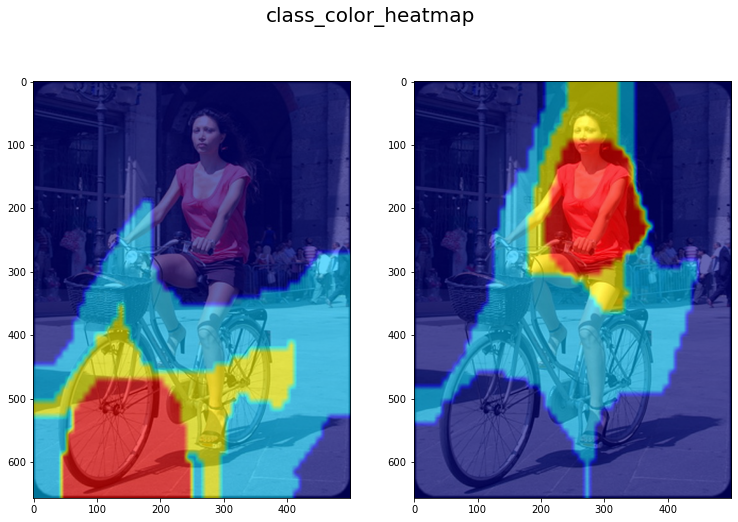

In [38]:
heatmaps = GetHeatmap(grid_data, height, width, title="class", figSet = True, fig = [1, 2])

In [42]:
type(grid_data)

list

In [64]:
resized_grid_data = GetResizedGridData(grid_data = grid_data, height = 224, width = 224)

In [65]:
len(resized_grid_data[0])

224

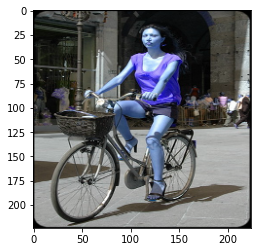

In [62]:
tmp = cv2.resize(CV2_IMG, (224, 224))

plt.imshow(tmp)